In [96]:
from __future__ import print_function
%matplotlib inline
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy
from scipy.spatial.distance import squareform
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

## Whole, ECD, Pore PCA Analyses

In [97]:
#load trajectories
wholetraj = md.load("/home/scottzhuang/tests/ensemble/whole.pdb")
wholetraj.superpose(wholetraj,42)

/home/scottzhuang/anaconda3/envs/deepchemistry/lib/python3.5/site-packages/mdtraj/formats/pdb/pdbfile.py:194: RuntimeWarning: divide by zero encountered in true_divide
  particle_density = traj.top.n_atoms / traj.unitcell_volumes[0]
/home/scottzhuang/anaconda3/envs/deepchemistry/lib/python3.5/site-packages/mdtraj/formats/pdb/pdbfile.py:196: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '


<mdtraj.Trajectory with 46 frames, 1540 atoms, 1540 residues, without unitcells at 0x2accc1099278>

In [98]:
print(wholetraj.xyz.shape)

(46, 1540, 3)


In [99]:
wholepca = PCA(n_components=2)
#wholepca.fit(wholetraj.xyz.reshape(wholetraj.n_frames, wholetraj.n_atoms * 3))
whole_reduced_cartesian = wholepca.fit_transform(wholetraj.xyz.reshape(wholetraj.n_frames, wholetraj.n_atoms * 3))
print(whole_reduced_cartesian.shape)
print(wholepca.explained_variance_ratio_)

(46, 2)
[ 0.42024871  0.28641018]


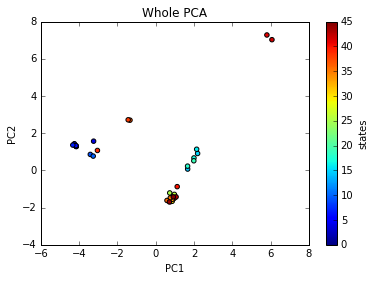

In [100]:
fig = plt.figure()
plt.scatter(whole_reduced_cartesian[:,0], whole_reduced_cartesian[:,1],c=wholetraj.time)
cbar = plt.colorbar()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Whole PCA')
cbar.set_label('states')
plt.show()

In [101]:
traj_4NPQ_BA1 = md.load("/media/scottzhuang/data/MD/BA1/4NPQ_BA1_md.skip10.ca.1540.pdb",stride=10)
traj_4NPQ_BA1.superpose(wholetraj,42)

<mdtraj.Trajectory with 292 frames, 1540 atoms, 1540 residues, and unitcells at 0x2acddddd3048>

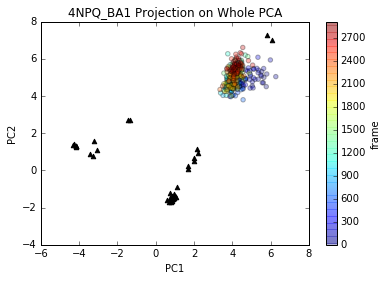

In [104]:
traj_4NPQ_BA1_reduced_cartesian = wholepca.transform(traj_4NPQ_BA1.xyz.reshape(traj_4NPQ_BA1.n_frames, traj_4NPQ_BA1.n_atoms * 3))
fig = plt.figure()
plt.scatter(traj_4NPQ_BA1_reduced_cartesian[:,0],traj_4NPQ_BA1_reduced_cartesian[:,1],c=traj_4NPQ_BA1.time,alpha=0.3)
cbar = plt.colorbar()
plt.scatter(whole_reduced_cartesian[:,0], whole_reduced_cartesian[:,1],c='black',marker='^')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('4NPQ_BA1 Projection on Whole PCA')
cbar.set_label('frame')
plt.show()

In [105]:
traj_4NPQ_BA1_F238LI233T = md.load("/media/scottzhuang/data/MD/F238LI233T/4NPQ_BA1_F238LI233T_md.skip10.ca.1540.pdb",stride=10)
traj_4NPQ_BA1_F238LI233T.superpose(wholetraj,42)

<mdtraj.Trajectory with 293 frames, 1540 atoms, 1540 residues, and unitcells at 0x2acdfd1e5198>

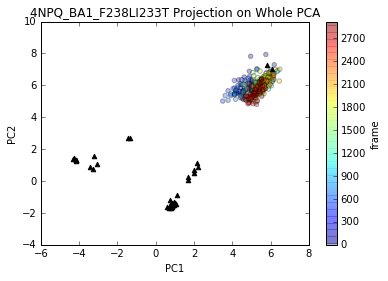

In [106]:
traj_4NPQ_BA1_F238LI233T_reduced_cartesian = wholepca.transform(traj_4NPQ_BA1_F238LI233T.xyz.reshape(traj_4NPQ_BA1_F238LI233T.n_frames, traj_4NPQ_BA1_F238LI233T.n_atoms * 3))
fig = plt.figure()
plt.scatter(traj_4NPQ_BA1_F238LI233T_reduced_cartesian[:,0],traj_4NPQ_BA1_F238LI233T_reduced_cartesian[:,1],c=traj_4NPQ_BA1_F238LI233T.time,alpha=0.3)
cbar = plt.colorbar()
plt.scatter(whole_reduced_cartesian[:,0], whole_reduced_cartesian[:,1],c='black',marker='^')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('4NPQ_BA1_F238LI233T Projection on Whole PCA')
cbar.set_label('frame')
plt.show()

In [107]:
traj_4NPQ_BA1_F238L = md.load("/media/scottzhuang/data/MD/4NPQ_F238L/4NPQ_BA1_F238L_md.skip10.ca.1540.pdb",stride=10)
traj_4NPQ_BA1_F238L.superpose(wholetraj,frame=42)

<mdtraj.Trajectory with 303 frames, 1540 atoms, 1540 residues, and unitcells at 0x2acde647b160>

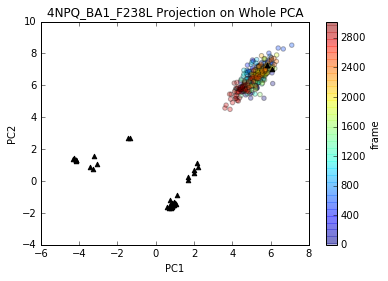

In [108]:
traj_4NPQ_BA1_F238L_reduced_cartesian = wholepca.transform(traj_4NPQ_BA1_F238L.xyz.reshape(traj_4NPQ_BA1_F238L.n_frames, traj_4NPQ_BA1_F238L.n_atoms * 3))
fig = plt.figure()
plt.scatter(traj_4NPQ_BA1_F238L_reduced_cartesian[:,0],traj_4NPQ_BA1_F238L_reduced_cartesian[:,1],c=traj_4NPQ_BA1_F238L.time,alpha=0.3)
cbar = plt.colorbar()
plt.scatter(whole_reduced_cartesian[:,0], whole_reduced_cartesian[:,1],c='black',marker='^')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('4NPQ_BA1_F238L Projection on Whole PCA')
cbar.set_label('frame')
plt.show()

In [109]:
traj_4NPQ_BA1_I233T = md.load("/media/scottzhuang/data/MD/4NPQ_BA1_I233T_MD/4NPQ_BA1_I233T_md.skip10.ca.1540.pdb",stride=10)
traj_4NPQ_BA1_I233T.superpose(wholetraj,42)

<mdtraj.Trajectory with 237 frames, 1540 atoms, 1540 residues, and unitcells at 0x2acdb26a6080>

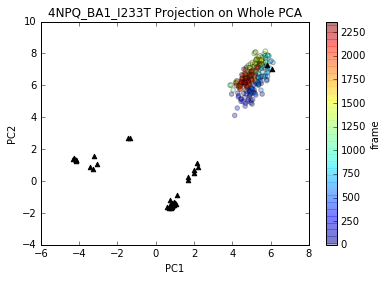

In [110]:
traj_4NPQ_BA1_I233T_reduced_cartesian = wholepca.transform(traj_4NPQ_BA1_I233T.xyz.reshape(traj_4NPQ_BA1_I233T.n_frames, traj_4NPQ_BA1_I233T.n_atoms * 3))
fig = plt.figure()
plt.scatter(traj_4NPQ_BA1_I233T_reduced_cartesian[:,0],traj_4NPQ_BA1_I233T_reduced_cartesian[:,1],c=traj_4NPQ_BA1_I233T.time,alpha=0.3)
cbar = plt.colorbar()
plt.scatter(whole_reduced_cartesian[:,0], whole_reduced_cartesian[:,1],c='black',marker='^')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('4NPQ_BA1_I233T Projection on Whole PCA')
cbar.set_label('frame')
plt.show()

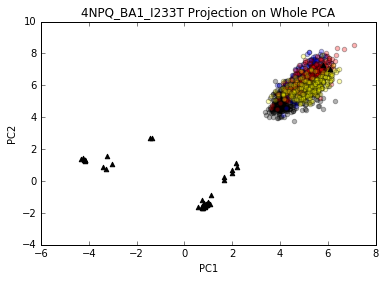

In [112]:
traj_4NPQ_BA1_I233T_reduced_cartesian = wholepca.transform(traj_4NPQ_BA1_I233T.xyz.reshape(traj_4NPQ_BA1_I233T.n_frames, traj_4NPQ_BA1_I233T.n_atoms * 3))
fig = plt.figure()
plt.scatter(traj_4NPQ_BA1_reduced_cartesian[:,0],traj_4NPQ_BA1_reduced_cartesian[:,1],c="black",alpha=0.3)
plt.scatter(traj_4NPQ_BA1_I233T_reduced_cartesian[:,0],traj_4NPQ_BA1_I233T_reduced_cartesian[:,1],c="blue",alpha=0.3)
plt.scatter(traj_4NPQ_BA1_F238L_reduced_cartesian[:,0],traj_4NPQ_BA1_F238L_reduced_cartesian[:,1],c="red",alpha=0.3)
plt.scatter(traj_4NPQ_BA1_F238LI233T_reduced_cartesian[:,0],traj_4NPQ_BA1_F238LI233T_reduced_cartesian[:,1],c="yellow",alpha=0.3)
plt.scatter(whole_reduced_cartesian[:,0], whole_reduced_cartesian[:,1],c='black',marker='^')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('4NPQ_BA1_I233T Projection on Whole PCA')
cbar.set_label('frame')
plt.show()